In [1]:
"""
Malware LightGBM TF-IDF-based classification model
"""
__author__ = "Alisher Mazhirinov"

In [2]:
import pandas as pd

## Load datasets

In [4]:
malware = pd.read_parquet('../feature-extraction/floor/malware_tfidf.parquet')
benign = pd.read_parquet('../feature-extraction/floor/benignForMalware_tfidf.parquet')

In [38]:
malware_cols = [col for col in malware.columns if col.startswith('tfidf_malware_')]
# Calculate the sum of all tf-idf features
malware['tfidf_malware_total'] = malware[malware_cols].sum(axis=1)
# Delete rows with zero values
malware = malware[malware['tfidf_malware_total'] > 0].reset_index(drop=True)
malware

,domain_name,label,language,malicious_tags,all_tags,word_count,domain_length,tfidf_malware_help,tfidf_malware_new,tfidf_malware_contact,...,tfidf_malware_management,tfidf_malware_health,tfidf_malware_events,tfidf_malware_news,tfidf_malware_find,tfidf_malware_online,tfidf_malware_standard,tfidf_malware_search,tfidf_malware_school,tfidf_malware_total
0,adishankaracharyavedic.com,1,en,1,175,318,26,2,2,2,...,0,0,0,0,0,0,0,0,0,9
1,www.nirjhara.com,1,en,15,1298,1606,16,0,0,2,...,0,0,1,1,0,0,0,0,0,32
2,eloquentcs.com,1,en,7,165,309,14,0,0,3,...,0,1,0,0,0,0,0,0,0,8
3,cbscolleges.in,1,en,1,581,733,14,0,4,3,...,0,2,3,2,0,0,0,0,0,23
4,griincom.co.ke,1,en,43,683,404,14,0,0,4,...,0,0,0,0,0,0,0,0,0,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5947,combrokers.com,1,en,2,142,307,14,0,1,1,...,2,0,0,2,2,0,1,0,0,30
5948,basithamitech.com,1,en,21,426,883,17,3,0,3,...,1,0,0,0,0,0,1,0,0,63
5949,ardesia.ph,1,en,29,550,582,10,0,0,2,...,0,2,3,0,1,0,0,0,0,14
5950,saisiddhipls.com,1,en,22,173,112,16,0,0,2,...,0,0,0,0,0,0,0,0,6,13


In [39]:
# Do the same with benign dataset
benign_cols = [col for col in benign.columns if col.startswith('tfidf_malware_')]
benign['tfidf_malware_total'] = benign[benign_cols].sum(axis=1)
benign = benign[benign['tfidf_malware_total'] > 0].reset_index(drop=True)
# Make benign dataset contain the same amount of features as in malware dataset
benign = benign.sort_values(by='tfidf_malware_total', ascending=False).head(5952).reset_index(drop=True)
benign

,domain_name,label,language,malicious_tags,all_tags,word_count,domain_length,tfidf_malware_help,tfidf_malware_new,tfidf_malware_contact,...,tfidf_malware_management,tfidf_malware_health,tfidf_malware_events,tfidf_malware_news,tfidf_malware_find,tfidf_malware_online,tfidf_malware_standard,tfidf_malware_search,tfidf_malware_school,tfidf_malware_total
0,nailboo.com,0,en,2148,17363,7699,11,3,2,1,...,0,0,0,0,3,0,0,1,0,1226
1,shipour.wedding,0,en,104,7539,8503,15,15,9,2,...,0,0,3,0,0,8,0,2,0,945
2,www.waldenu.edu,0,en,448,4472,7100,15,17,6,5,...,58,95,2,2,7,73,0,15,9,657
3,christensen.co.za,0,en,46,8389,4957,17,3,0,4,...,0,0,0,0,3,0,0,4,0,640
4,costcoauto.com,0,en,38,1217,8081,14,4,9,9,...,0,0,3,0,5,7,1,3,0,611
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5947,tribune.net.ph,0,en,1,1124,513,14,0,2,0,...,0,0,0,3,0,0,0,0,1,41
5948,careers.utas.edu.au,0,en,6,470,790,19,1,1,0,...,1,0,0,0,0,0,0,5,2,41
5949,crossvilleinc.com,0,en,23,768,859,17,0,0,4,...,1,0,1,1,0,0,1,1,0,41
5950,grow.cheap,0,en,40,574,419,10,1,1,3,...,0,0,0,0,2,8,0,3,0,41


In [40]:
# Concatenate two datasets
combined_df = pd.concat([malware, benign], ignore_index=True)
# Shuffle them in random order
shuffled_df = combined_df.sample(frac=1, random_state=42).reset_index(drop=True)
shuffled_df

,domain_name,label,language,malicious_tags,all_tags,word_count,domain_length,tfidf_malware_help,tfidf_malware_new,tfidf_malware_contact,...,tfidf_malware_management,tfidf_malware_health,tfidf_malware_events,tfidf_malware_news,tfidf_malware_find,tfidf_malware_online,tfidf_malware_standard,tfidf_malware_search,tfidf_malware_school,tfidf_malware_total
0,amerigas.com,0,en,6,712,1637,12,4,0,3,...,0,0,0,0,3,10,0,4,0,170
1,brightkidsformula.com,1,en,21,585,522,21,0,1,1,...,0,3,0,0,0,3,0,2,0,33
2,danaburkart.com,1,en,1,36,34,15,0,0,0,...,0,0,0,0,0,0,0,0,0,2
3,wgtechexpress.com,1,en,5,20,86,17,0,0,0,...,0,0,0,0,0,2,0,0,0,7
4,everbridge.net,0,en,16,1293,1223,14,0,0,5,...,14,0,9,0,1,0,0,4,0,127
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11899,ljku.edu.in,0,en,2,1384,1452,11,0,2,2,...,4,0,4,2,0,1,0,0,0,46
11900,bitlq.app,1,en,2,359,2837,9,11,4,2,...,1,0,0,0,3,1,0,0,0,221
11901,annuitybroker.ca,1,en,5,111,79,16,0,0,0,...,0,0,0,0,0,0,0,1,0,1
11902,ratom.in,1,en,31,2215,325,8,1,0,3,...,0,0,0,0,0,1,0,0,0,19


In [41]:
# Delete all unnecessary features + overfitted features
shuffled_df = shuffled_df.drop(columns=['language', 'domain_name', 'word_count', 'domain_length', 'all_tags', 
                                         'tfidf_malware_contact', 'tfidf_malware_new', 'tfidf_malware_news',
                                         'tfidf_malware_privacy', 'tfidf_malware_policy',
                                         'malicious_tags', 'tfidf_malware_total'])
#shuffled_df.to_csv('7_output_files/main_bm_dataset.csv', index=False)

In [42]:
shuffled_df

,label,tfidf_malware_help,tfidf_malware_make,tfidf_malware_time,tfidf_malware_view,tfidf_malware_home,tfidf_malware_products,tfidf_malware_use,tfidf_malware_experience,tfidf_malware_information,...,tfidf_malware_immediate,tfidf_malware_support,tfidf_malware_management,tfidf_malware_health,tfidf_malware_events,tfidf_malware_find,tfidf_malware_online,tfidf_malware_standard,tfidf_malware_search,tfidf_malware_school
0,0,4,2,0,4,12,0,3,0,4,...,0,10,0,0,0,3,10,0,4,0
1,1,0,1,0,7,3,3,0,0,0,...,0,6,0,3,0,0,3,0,2,0
2,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2,0,0,0
4,0,0,0,0,4,0,6,5,6,0,...,0,6,14,0,9,1,0,0,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11899,0,0,0,1,0,0,0,0,0,2,...,0,0,4,0,4,0,1,0,0,0
11900,1,11,16,11,0,1,1,13,6,7,...,0,0,1,0,0,3,1,0,0,0
11901,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
11902,1,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0


## LightGBM model

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] lambda_l1 is set=1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1
[LightGBM] [Warning] lambda_l2 is set=5, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=0, subsample_freq=0 will be ignored. Current value: bagging_freq=0
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] l

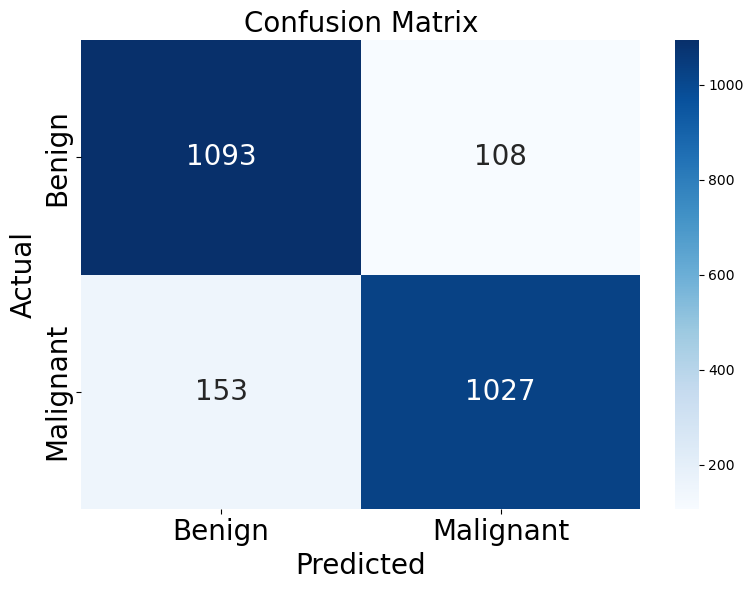

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, RandomizedSearchCV
import lightgbm as lgb
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, log_loss

y = shuffled_df['label']
X = shuffled_df.drop(['label'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define parameter grid for tuning
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1],
    'num_leaves': [20, 31, 40],
    'max_depth': [-1, 10, 20],
    'feature_fraction': [0.6, 0.8, 1.0],
    'bagging_fraction': [0.6, 0.8, 1.0],
    'bagging_freq': [0, 5, 10],
    'lambda_l1': [0, 1, 5],
    'lambda_l2': [0, 1, 5],
    'min_data_in_leaf': [10, 20, 50],
    'min_split_gain': [0, 0.01, 0.1],
    'scale_pos_weight': [1, 2, 5],
    'n_estimators': [400],
    'boosting_type': ['gbdt', 'dart'],
}

# Set up the LightGBM model
lgb_estimator = lgb.LGBMClassifier(objective='binary', metric='binary_logloss')

# Perform Randomized Search for parameter tuning
random_search = RandomizedSearchCV(estimator=lgb_estimator, param_distributions=param_grid, 
                                   n_iter=50, scoring='accuracy', cv=5, verbose=1, random_state=42)

# Fit the model
random_search.fit(X_train, y_train)

# Get the best parameters
print("Best Parameters:", random_search.best_params_)

# Predict and evaluate the model
y_pred = random_search.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Print confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Plot Confusion Matrix for visualization
plt.figure(figsize=(8, 6))

sns.heatmap(
    conf_matrix,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=['Benign', 'Malignant'],
    yticklabels=['Benign', 'Malignant'],
    annot_kws={"size": 20}
)

plt.xlabel('Predicted', fontsize=20)
plt.ylabel('Actual', fontsize=20)
plt.title('Confusion Matrix', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.tight_layout()
plt.savefig("malware_lgbm_confusion_matrix.pdf", dpi=300, bbox_inches='tight')
plt.show()

[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10


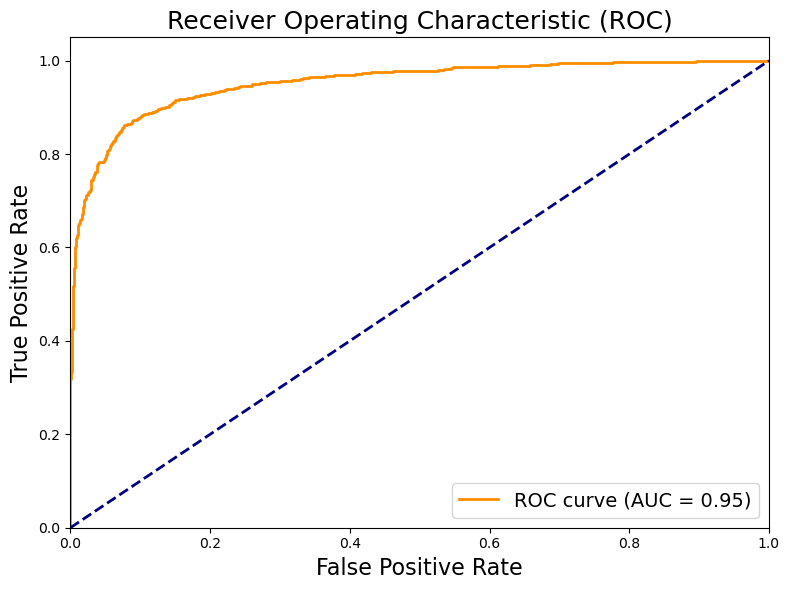

In [45]:
from sklearn.metrics import roc_curve, auc

# Get the probabilities for the positive class (label=1)
y_proba = random_search.predict_proba(X_test)[:, 1]

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

# Plot the ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('Receiver Operating Characteristic (ROC)', fontsize=18)
plt.legend(loc="lower right", fontsize=14)

plt.tight_layout()
plt.savefig("malware_lgbm_roc_auc.pdf", dpi=300, bbox_inches='tight')
plt.show()

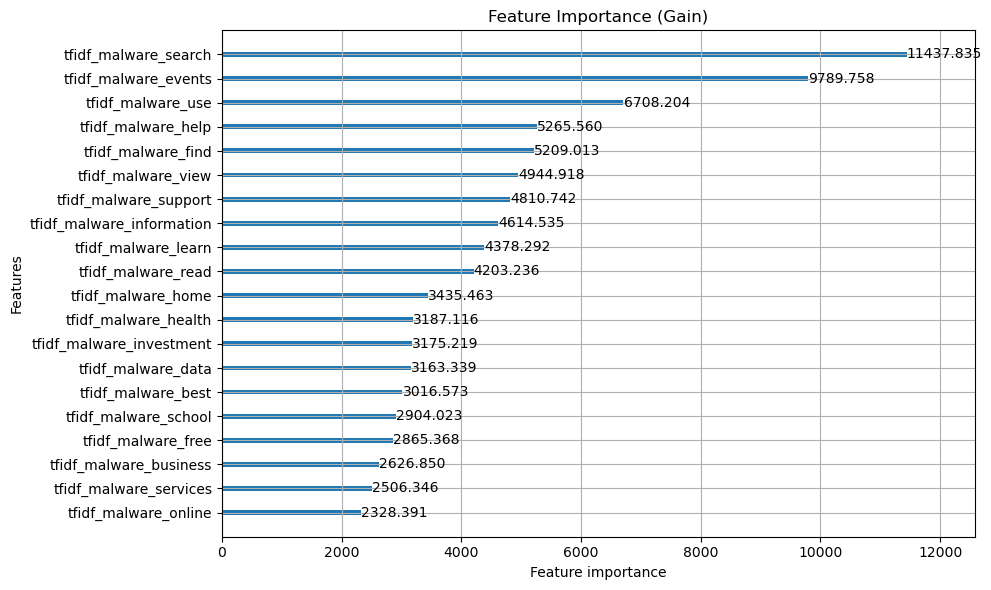

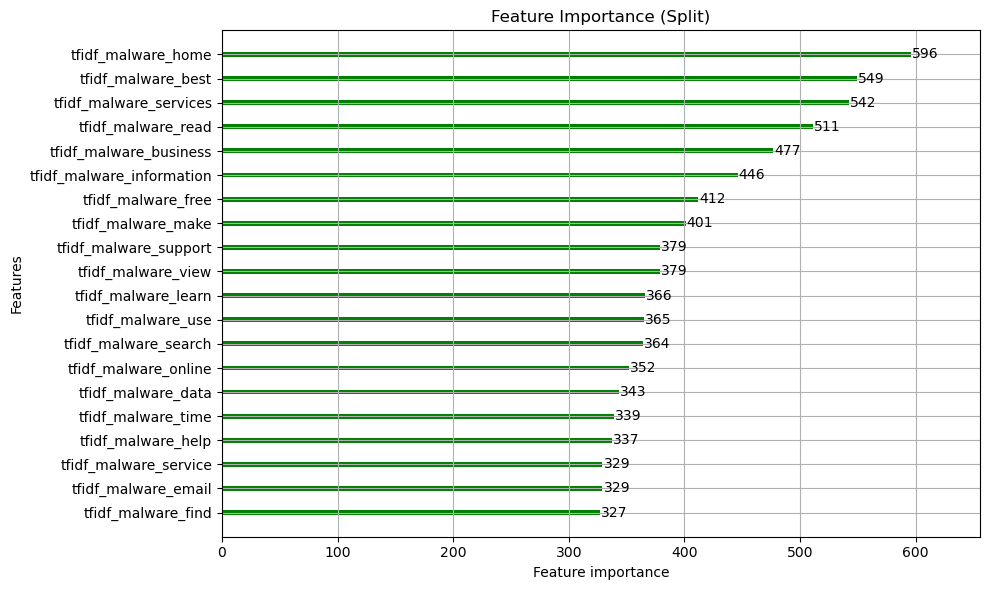

In [46]:
# Feature Importance (Gain-based)
lgb.plot_importance(random_search.best_estimator_, importance_type='gain', max_num_features=20, figsize=(10, 6))
plt.title("Feature Importance (Gain)")
plt.tight_layout()
plt.show()

# Feature Importance (Split-based)
lgb.plot_importance(random_search.best_estimator_, importance_type='split', max_num_features=20, figsize=(10, 6), color="green")
plt.title("Feature Importance (Split)")
plt.tight_layout()
plt.show()

## Log loss plot

[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current va

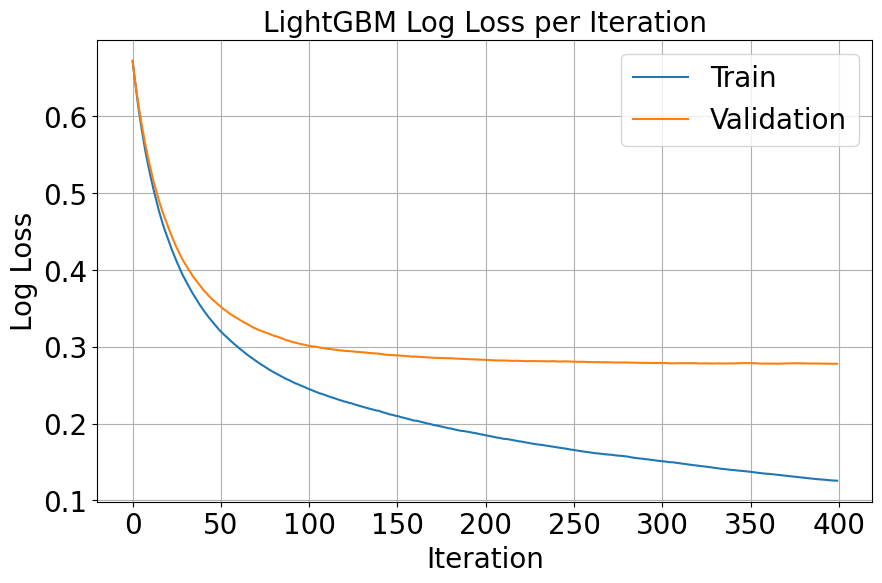

In [47]:
best_model = random_search.best_estimator_

# Refit model to capture evaluation results
eval_result = {}
best_model.fit(
    X_train, y_train,
    eval_set=[(X_train, y_train), (X_test, y_test)],
    eval_metric='binary_logloss',
    eval_names=['train', 'valid'],
    callbacks=[lgb.record_evaluation(eval_result), lgb.log_evaluation(0)]
)
# Plot log loss
plt.figure(figsize=(10,6))
epochs = len(eval_result['train']['binary_logloss'])
x_axis = range(0, epochs)
plt.plot(x_axis, eval_result['train']['binary_logloss'], label='Train')
plt.plot(x_axis, eval_result['valid']['binary_logloss'], label='Validation')
plt.xlabel('Iteration', fontsize=20)
plt.ylabel('Log Loss', fontsize=20)
plt.title('LightGBM Log Loss per Iteration', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(fontsize=20)
plt.grid()
plt.savefig("malware_lgbm_log_loss.pdf", dpi=300, bbox_inches='tight')
plt.show()

## Feature importance with SHAP

c:\Users\mazhirinova\AppData\Local\anaconda3\envs\ibt_kernel\Lib\site-packages\shap\explainers\_tree.py:583: UserWarning: LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray
  warnings.warn(


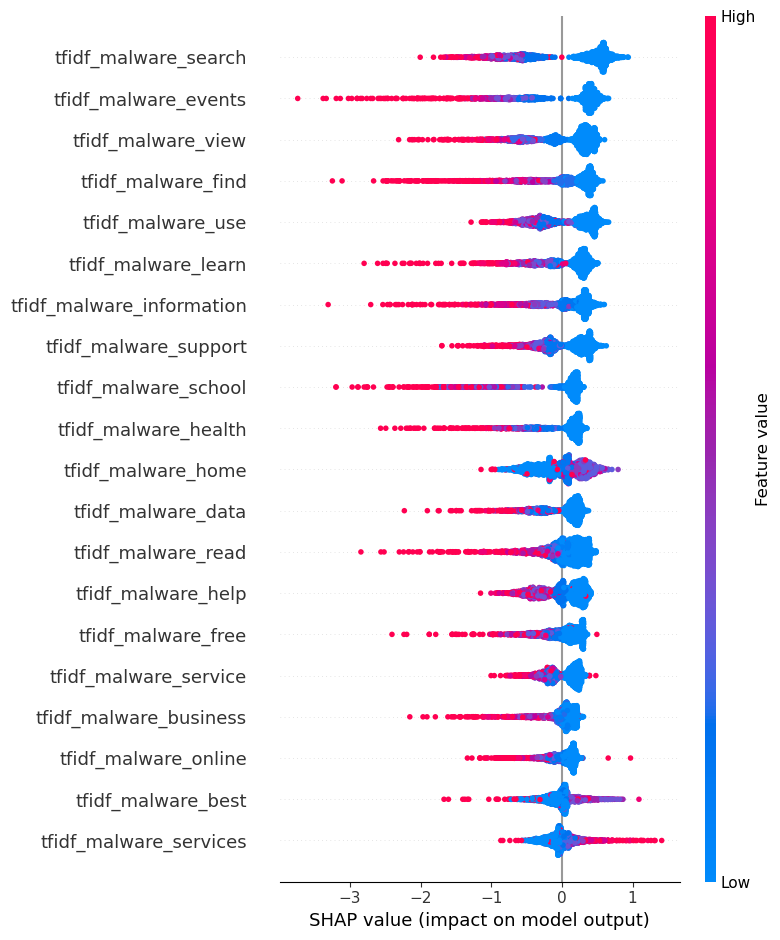

In [48]:
import shap

# SHAP: Create explainer
explainer = shap.Explainer(random_search.best_estimator_)
shap_values = explainer.shap_values(X_test)

# Summary Plot
plt.savefig("malware_lgbm_log_loss.pdf", dpi=300, bbox_inches='tight')
shap.summary_plot(shap_values, X_test, plot_type="dot")

